In [1]:
from qiskit import *

In [2]:
#Create two quantum registers
qr = QuantumRegister(2)

In [3]:
#Create two classical registers
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr, cr) 

In [5]:
%matplotlib inline

In [6]:
circuit.draw()

In [7]:
#Creates a Haddamard Gate
circuit.h(qr[0])

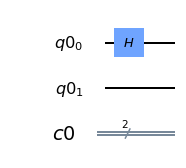

In [8]:
circuit.draw(output='mpl')

In [9]:
#control x gate, generates entaglement
circuit.cx(qr[0],qr[1])

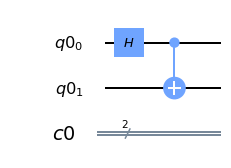

In [10]:
circuit.draw(output='mpl')

In [11]:
circuit.measure(qr, cr)

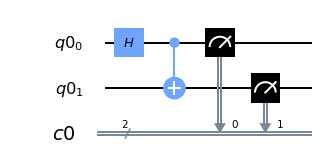

In [12]:
circuit.draw(output='mpl')

In [13]:
#Aer is a simulator of quantum circuits on your local computer. qasm stands for quantum assmebley.
simulator = Aer.get_backend('qasm_simulator')

In [14]:
#This gets back the results of the simulation
result = execute(circuit, backend = simulator).result()

In [15]:
from qiskit.tools.visualization import plot_histogram

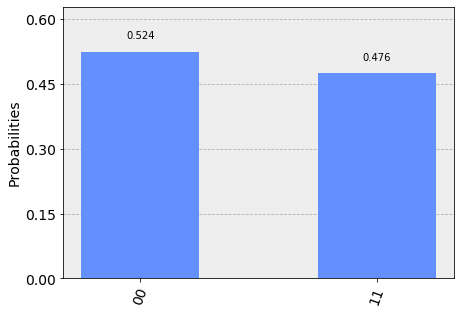

In [16]:
#Plots the simulation
plot_histogram(result.get_counts(circuit))

In [17]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider = IBMQ.get_provider('ibm-q')

In [19]:
#Sets the device that is used. In this case the device is called melbourne.
qcomp = provider.get_backend('ibmq_16_melbourne')

In [20]:
#Specifys what to execute and identifies the device
job = execute(circuit, backend=qcomp)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
#Checks the queue for where our job is at
job_monitor(job)

Job Status: job has successfully run


In [23]:
result = job.result()

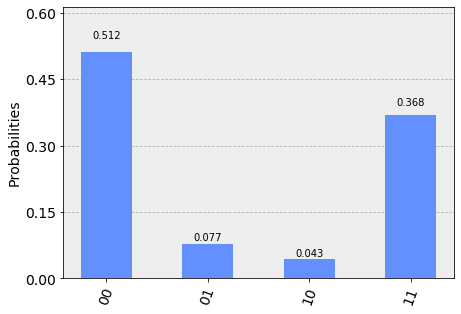

In [24]:
plot_histogram(result.get_counts(circuit))